In [ ]:
# Import library
from google.colab import drive

# Mount  Google Drive /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library Pandas
import pandas as pd

In [ ]:
#read file CSV
data = pd.read_csv('/content/drive/MyDrive/Dataset/DataQuwaci.csv')

In [ ]:
#show data head
data.head()

,No,NamaSungai,TitikPantau,Waktu,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,2.44,2


In [ ]:
# show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   TSS            2500 non-null   float64
 6   DO             2500 non-null   float64
 7   BOD            2500 non-null   float64
 8   COD            2500 non-null   float64
 9   Nitrat         2500 non-null   float64
 10  FecalColiform  2500 non-null   float64
 11  Fosfat         2500 non-null   float64
 12  IP             2500 non-null   float64
 13  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 273.6+ KB


In [ ]:
 #describe data
data.describe()

,No,pH,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


In [ ]:
#check missing value
data_hilang = data.isnull().sum()
data_hilang

No               0
NamaSungai       0
TitikPantau      0
Waktu            0
pH               0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
IP               0
Class            0
dtype: int64

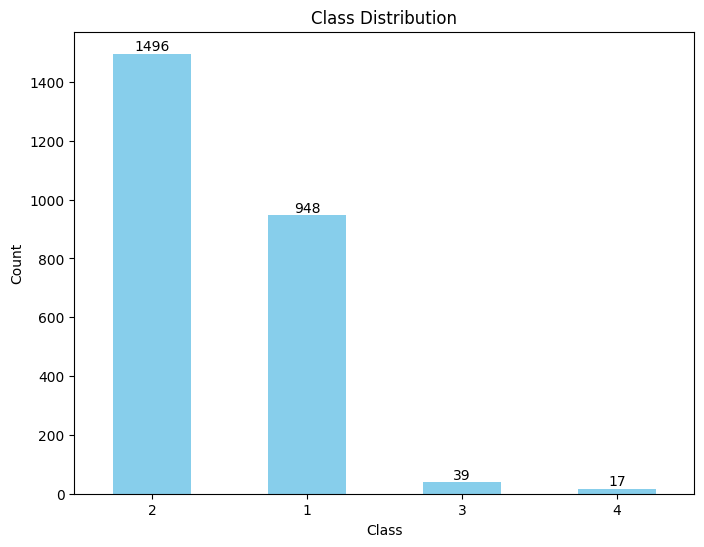

In [ ]:
#check class distribution
import matplotlib.pyplot as plt
class_counts = data['Class'].value_counts()

class_counts = data['Class'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar', color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotating x-axis labels for better visibility

# Add count values on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

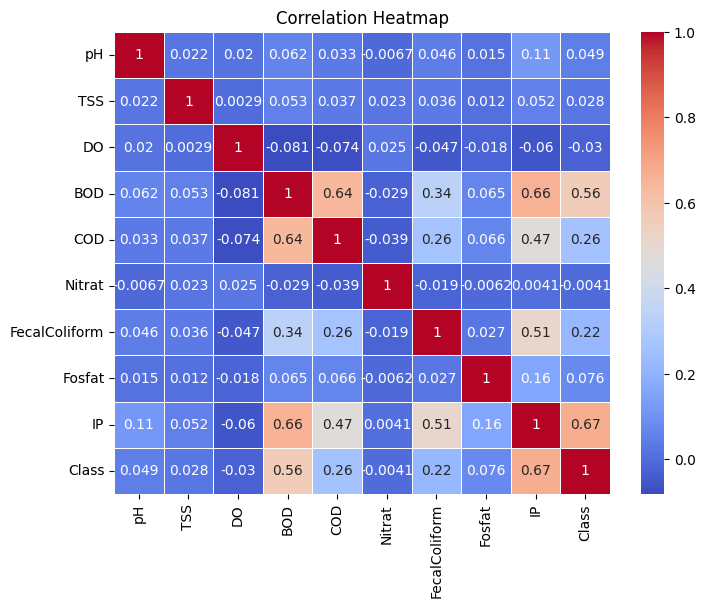

In [ ]:
#check correlation
import seaborn as sns
# Drop the specified columns
data = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu'])

correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

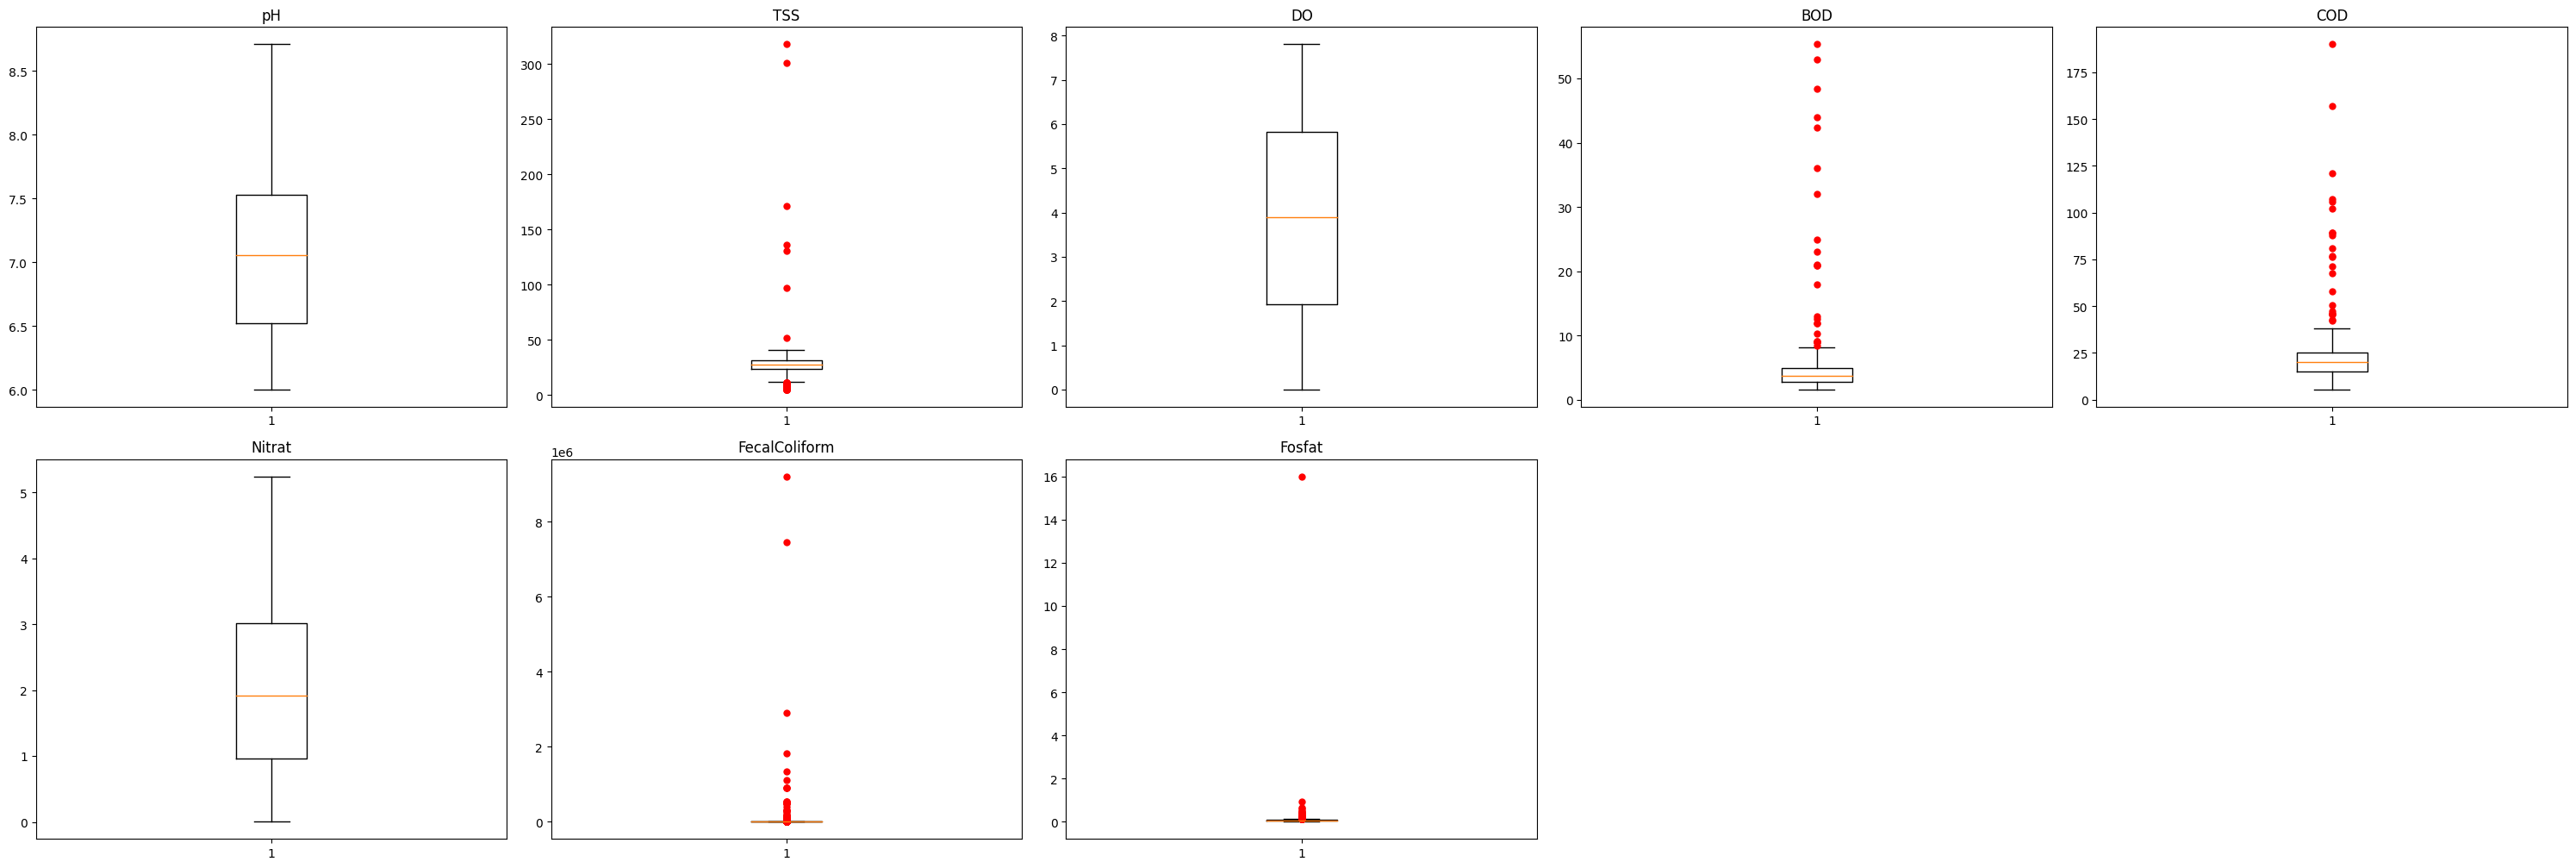

In [ ]:
#check data outlier
import matplotlib.pyplot as plt

px = 1
plt.figure(figsize=(30, 30))
for i in ['pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat']:
    if px <= 26:
        plt.subplot(6, 5, px)
        boxplot = plt.boxplot(data[i], flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))
        plt.title(i)
        px = px + 1
    else:
        break

plt.tight_layout()
plt.show()

In [ ]:
# Assuming your DataFrame is named 'data' and you've dropped the specified columns
data.to_csv('new_data.csv', index=False)